# Importing Libraries

In [127]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

from imblearn.over_sampling import SMOTE


In [126]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


# Load the Dataset

In [128]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data
test_data


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
5267,13172,1770,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
5268,13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
5269,13174,1216,Placebo,11773,F,N,N,N,N,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0


# Exploratory Data Analysis

# Data Description

In [129]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [130]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

In [131]:
df = pd.DataFrame(train_data)

In [132]:
df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [133]:
train_data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [134]:
train_data.shape

(7905, 20)

In [135]:
train_data.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [136]:
train_data.describe().T.style.background_gradient(cmap='GnBu')


,count,mean,std,min,25%,50%,75%,max
id,7905.000000,3952.000000,2282.121272,0.000000,1976.000000,3952.000000,5928.000000,7904.000000
N_Days,7905.000000,2030.173308,1094.233744,41.000000,1230.000000,1831.000000,2689.000000,4795.000000
Age,7905.000000,18373.146490,3679.958739,9598.000000,15574.000000,18713.000000,20684.000000,28650.000000
Bilirubin,7905.000000,2.594485,3.812960,0.300000,0.700000,1.100000,3.000000,28.000000
Cholesterol,7905.000000,350.561923,195.379344,120.000000,248.000000,298.000000,390.000000,1775.000000
Albumin,7905.000000,3.548323,0.346171,1.960000,3.350000,3.580000,3.770000,4.640000
Copper,7905.000000,83.902846,75.899266,4.000000,39.000000,63.000000,102.000000,588.000000
Alk_Phos,7905.000000,1816.745250,1903.750657,289.000000,834.000000,1181.000000,1857.000000,13862.400000
SGOT,7905.000000,114.604602,48.790945,26.350000,75.950000,108.500000,137.950000,457.250000
Tryglicerides,7905.000000,115.340164,52.530402,33.000000,84.000000,104.000000,139.000000,598.000000


# Null Values

In [137]:
train_data.isna().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [138]:
train_data.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [139]:
for column in train_data.columns:
    if train_data[column].dtype=='object':
        print(column,": ",train_data[column].unique())

Drug :  ['D-penicillamine' 'Placebo']
Sex :  ['M' 'F']
Ascites :  ['N' 'Y']
Hepatomegaly :  ['N' 'Y']
Spiders :  ['N' 'Y']
Edema :  ['N' 'Y' 'S']
Status :  ['D' 'C' 'CL']


In [140]:
train_data['Stage'].unique()

array([3., 4., 2., 1.])

In [141]:
train_data['Stage'].fillna(train_data['Stage'].mode()[0],inplace=True)

In [142]:
train_data.groupby('Stage').size()

Stage
1.0     397
2.0    1652
3.0    3153
4.0    2703
dtype: int64

In [143]:
label_list = ['Drug','Sex','Ascites','Hepatomegaly','Spiders']
for col in label_list:
    train_data[col].fillna(train_data[col].mode()[0],inplace=True)

In [144]:
for column in train_data.columns:
    if train_data[column].dtype=='object':
        print(column,": ",train_data[column].unique())

Drug :  ['D-penicillamine' 'Placebo']
Sex :  ['M' 'F']
Ascites :  ['N' 'Y']
Hepatomegaly :  ['N' 'Y']
Spiders :  ['N' 'Y']
Edema :  ['N' 'Y' 'S']
Status :  ['D' 'C' 'CL']


In [145]:
train_data.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [146]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].median(), inplace=True)

In [147]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

id               0
N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [148]:
# For Categorical type
df.select_dtypes(include=('object')).isna().sum()

Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
Status          0
dtype: int64

In [149]:
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)
    
df.select_dtypes(include=('object')).isna().sum()

Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
Status          0
dtype: int64

In [150]:
train_data['Status'].value_counts()

C     4965
D     2665
CL     275
Name: Status, dtype: int64

# Data Visualization

Stage
1.0     397
2.0    1652
3.0    3153
4.0    2703
dtype: int64


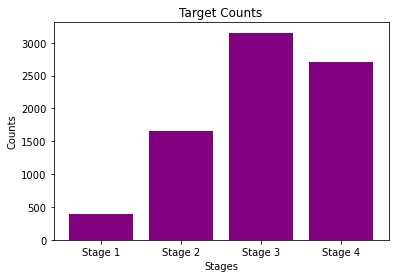

In [152]:
counts = train_data.groupby('Stage').size()
print(counts)
plt.bar(x = counts.index, height = counts, color = 'purple')
plt.xticks(rotation = 90)
plt.title('Target Counts')
plt.xlabel('Stages')
plt.ylabel('Counts')
plt.xticks([1,2,3,4], ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], rotation = 0)
plt.show()

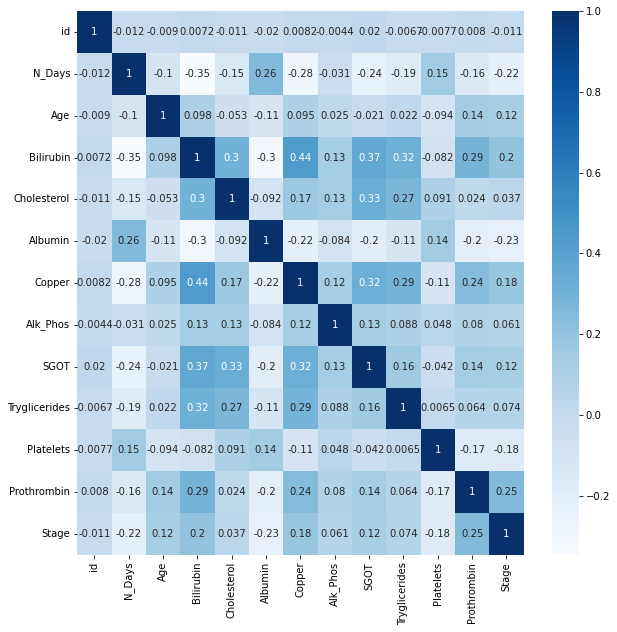

In [153]:
corr = train_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='Blues',annot=True)
plt.show()

In [154]:
corr

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
id,1.000000,-0.011638,-0.008986,0.007194,-0.011046,-0.019808,0.008203,-0.004393,0.020395,-0.006650,-0.007707,0.007979,-0.011391
N_Days,-0.011638,1.000000,-0.100748,-0.346434,-0.145811,0.255724,-0.284355,-0.030874,-0.240918,-0.186453,0.147626,-0.156032,-0.216820
Age,-0.008986,-0.100748,1.000000,0.097915,-0.053473,-0.114666,0.094781,0.025283,-0.020901,0.021522,-0.093794,0.140859,0.117863
Bilirubin,0.007194,-0.346434,0.097915,1.000000,0.302153,-0.303191,0.442223,0.131317,0.368653,0.315681,-0.081987,0.294325,0.200134
Cholesterol,-0.011046,-0.145811,-0.053473,0.302153,1.000000,-0.091830,0.168266,0.129131,0.326864,0.274044,0.091455,0.023761,0.037372
Albumin,-0.019808,0.255724,-0.114666,-0.303191,-0.091830,1.000000,-0.218479,-0.083582,-0.200928,-0.112304,0.141284,-0.204600,-0.233245
Copper,0.008203,-0.284355,0.094781,0.442223,0.168266,-0.218479,1.000000,0.124058,0.323226,0.290435,-0.107894,0.238771,0.182007
Alk_Phos,-0.004393,-0.030874,0.025283,0.131317,0.129131,-0.083582,0.124058,1.000000,0.128746,0.087789,0.047869,0.079517,0.061326
SGOT,0.020395,-0.240918,-0.020901,0.368653,0.326864,-0.200928,0.323226,0.128746,1.000000,0.155287,-0.042004,0.136766,0.118419
Tryglicerides,-0.006650,-0.186453,0.021522,0.315681,0.274044,-0.112304,0.290435,0.087789,0.155287,1.000000,0.006511,0.063582,0.073614


In [155]:
corrw = train_data.corrwith(train_data['Stage']).sort_values(ascending=False)
corrw

Stage            1.000000
Prothrombin      0.254674
Bilirubin        0.200134
Copper           0.182007
SGOT             0.118419
Age              0.117863
Tryglicerides    0.073614
Alk_Phos         0.061326
Cholesterol      0.037372
id              -0.011391
Platelets       -0.175960
N_Days          -0.216820
Albumin         -0.233245
dtype: float64

Text(0.5, 1.0, 'Disease Stage Across Gender')

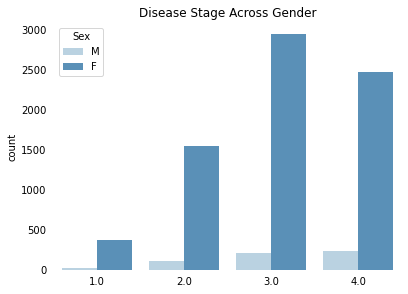

In [156]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=df['Stage'], hue=df['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Disease Stage Across Gender')

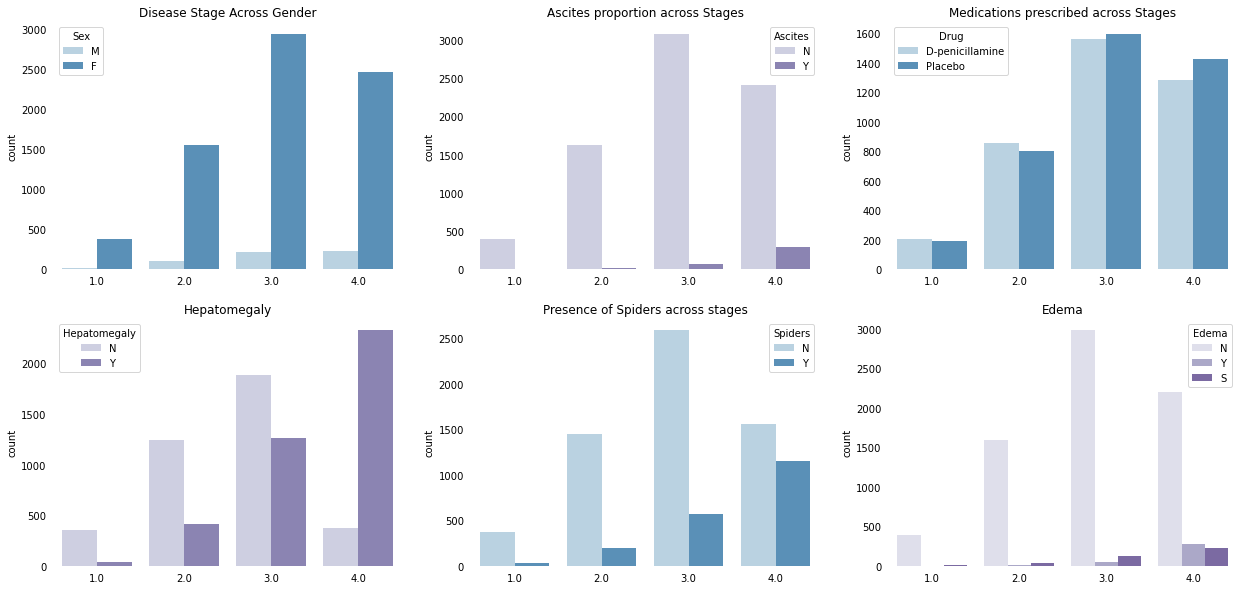

In [157]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=df['Stage'], hue=df['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Disease Stage Across Gender')

plt.subplot(2,3,2)
sns.countplot(x=df['Stage'], hue=df['Ascites'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Ascites proportion across Stages')

plt.subplot(2,3,3)
sns.countplot(x=df['Stage'], hue=df['Drug'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across Stages');

plt.subplot(2,3,4)
sns.countplot(x=df['Stage'], hue=df['Hepatomegaly'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Hepatomegaly');

plt.subplot(2,3,5)
sns.countplot(x=df['Stage'], hue=df['Spiders'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders across stages');

plt.subplot(2,3,6)
sns.countplot(x=df['Stage'], hue=df['Edema'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Edema');

In [169]:
data = pd.read_csv('cirrhosis.csv')

In [170]:
data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


# Feature Engineering

In [171]:
data.Age = (data.Age.values/365.0).round()
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [173]:
#checking missing values
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [174]:
#Imputation of missing values
for col in data.columns:
    if data[col].dtypes != 'object':
        data[col].fillna(data[col].median(),inplace=True)
    else:
        data[col].fillna(data[col].mode()[0],inplace=True)

In [175]:
data.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

# Prepocessing the data

In [178]:
#Encoding of categorical features
data.Sex.replace(['M','F'],[1,0],inplace=True)
data.Sex = data.Sex.astype(np.float64)
data.Edema.replace(['N','S','Y'],[0,-1,1],inplace=True)
data.Edema = data.Edema.astype(np.float64)
data.Ascites.replace(['Y','N'],[1,0],inplace=True)
data.Hepatomegaly.replace(['Y','N'],[1,0],inplace=True)
data.Spiders.replace(['Y','N'],[1,0],inplace=True)
data.Ascites = data.Ascites.astype(np.float64)
data.Hepatomegaly = df.Hepatomegaly.astype(np.float64)
data.Spiders = data.Spiders.astype(np.float64)
data.Drug.replace(['D-penicillamine','Placebo'],[0,1],inplace=True)
data.Drug = data.Drug.astype(np.float64)
data.Stage = data.Stage.astype(np.int64)

In [177]:
data.head()


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# Feature Scaling and Feature Selection

In [179]:
X = df.drop(['Stage','N_Days','Status'],axis=1)
y = df.Stage

In [180]:
smote = SMOTE()
X,y = smote.fit_resample(X,y)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stage', ylabel='count'>

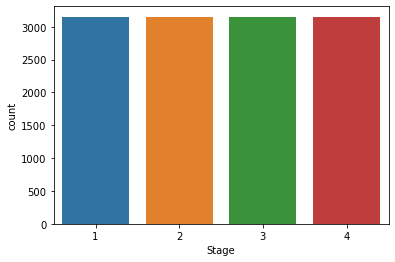

In [181]:
sns.countplot(y)

In [182]:
print(Y)

0       3.0
1       3.0
2       4.0
3       3.0
4       4.0
       ... 
7900    2.0
7901    4.0
7902    2.0
7903    4.0
7904    3.0
Name: Stage, Length: 7905, dtype: float64


In [183]:
#Feature Scaling
scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()

,id,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,-1.782306,-1.061199,0.966926,-4.069121,-0.198484,-0.845355,-0.514518,0.028756,0.008348,-0.144239,-0.709318,1.356994,-0.099103,1.455717,-1.023076,1.522591,-1.241142
1,-1.781861,1.064447,0.332628,0.273297,-0.198484,-0.845355,-0.514518,0.028756,-0.407814,0.120083,-0.106223,-0.219101,-0.184169,0.496296,-0.500158,1.117548,0.598909
2,-1.781416,1.064447,-1.253119,0.273297,-0.198484,1.258510,2.095756,3.870091,0.305607,-0.237853,-0.074481,0.764151,-0.401324,0.165461,-1.294994,-0.870847,1.589705
3,-1.780972,1.064447,0.121195,0.273297,-0.198484,-0.845355,-0.514518,0.028756,-0.496992,-0.474642,-0.233191,-0.291399,-0.071629,-0.860127,-0.332824,-0.011664,0.174281
4,-1.780527,1.064447,-0.407388,0.273297,-0.198484,1.258510,-0.514518,0.028756,-0.348362,0.020962,0.242937,-0.219101,-0.321013,0.297795,-0.332824,0.344283,0.032739


# Decision Tree Model

In [184]:
#Model Training & Evaluation
#Dividing the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [190]:
tree_classifier=DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [168]:
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))

[[681 139  87  22]
 [159 418 243 125]
 [116 229 384 200]
 [ 30 150 253 548]]
              precision    recall  f1-score   support

         1.0       0.69      0.73      0.71       929
         2.0       0.45      0.44      0.44       945
         3.0       0.40      0.41      0.41       929
         4.0       0.61      0.56      0.58       981

    accuracy                           0.54      3784
   macro avg       0.54      0.54      0.54      3784
weighted avg       0.54      0.54      0.54      3784



In [186]:
from sklearn.metrics import mean_squared_error
print("mean squared error :",mean_squared_error(y_test,dtree_pred))

mean squared error : 0.9521670190274841
